# "CompetitionDistance" and categorical variables vs "Sales"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')

# Table of content
### 1. Load and merge original data
### 2. Competition Distance 
### 3. Categorical features vs target
________________

## 1. Load and merge original data

In [3]:
train = pd.read_csv("../../data/train.csv")
store = pd.read_csv("../../data/store.csv")

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

In [5]:
merged_train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,668.0,NaN,0.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,635.0,1.0,0.0,NaN,1.0


## 2. CompetitionDistance 

We use `replot()`function from seaborn library with the default option `kind='scatter'`,to present the relationship between two numerical features, 'Sales' and 'CompetitionDistance' with a breakdown to two categorical features: 'Assortment' and 'StoreType'.


### 2.1a CompetitionDistance vs Sales in Assortment

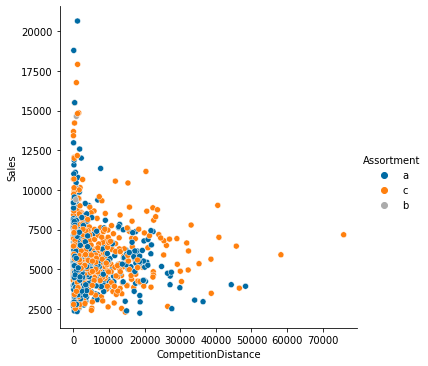

In [6]:
by_store_avg = merged_train_store.groupby(['Store', 'Assortment', 'StoreType'])
avg_sales_store = by_store_avg.agg(np.mean)
avg_sales_store = avg_sales_store.reset_index()

sns.relplot(x='CompetitionDistance', y='Sales',
            hue='Assortment',
            data=avg_sales_store);

### 2.1b CompetitionDistance vs Sales presented on separate charts for better readability

<Figure size 1440x864 with 0 Axes>

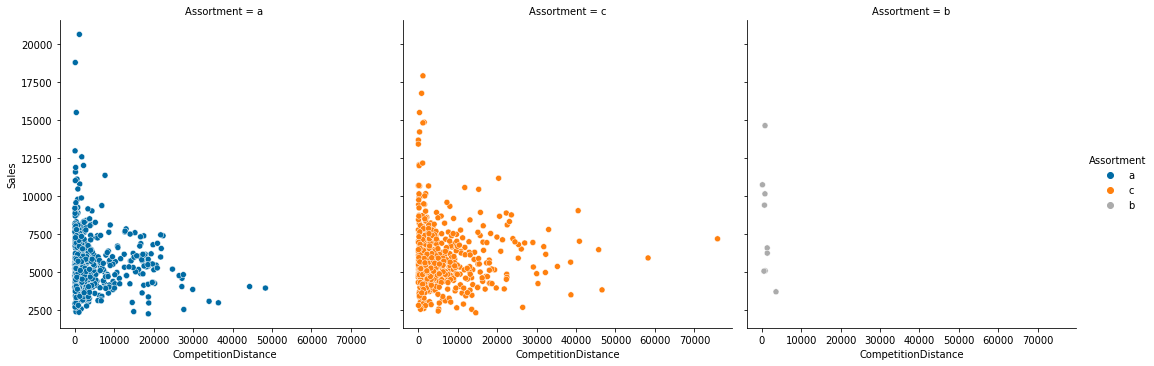

In [7]:
plt.figure(figsize=(20, 12))
sns.relplot(x='CompetitionDistance', y='Sales',
            col='Assortment',
            hue='Assortment',
            data=avg_sales_store);

### 2.2 CompetitionDistance vs Sales in StoreType

<Figure size 1440x648 with 0 Axes>

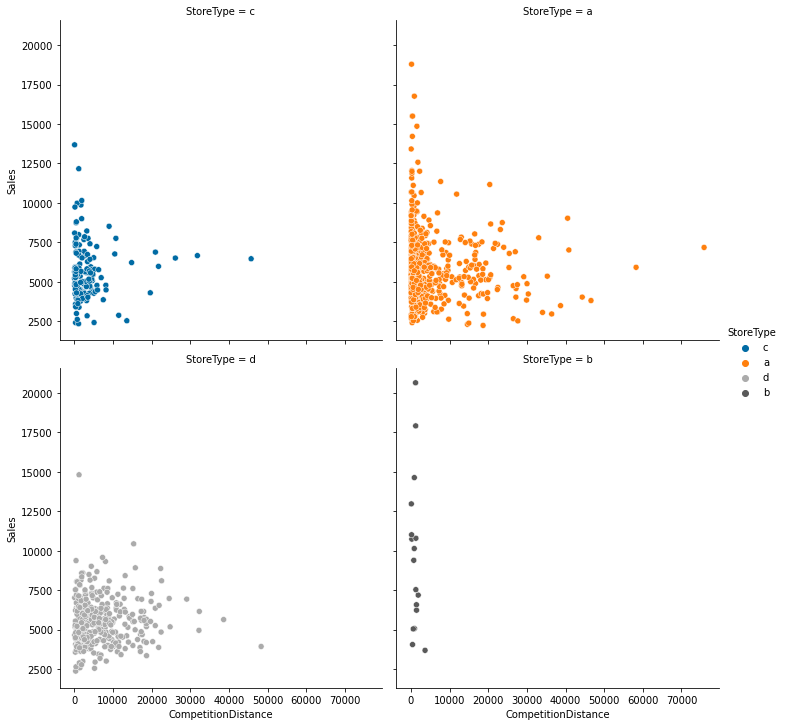

In [8]:
plt.figure(figsize=(20, 9))
sns.relplot(x='CompetitionDistance', y='Sales',
            col='StoreType',
            hue='StoreType',
            col_wrap=2,
            data=avg_sales_store);

In [20]:
nonzero_merged_Sales = merged_train_store.loc[~merged_train_store.loc[:, 'Sales'].isnull()]

nonzero_merged_Sales = nonzero_merged_Sales.loc[nonzero_merged_Sales.Sales > 0]

In [10]:
nonzero_merged_Sales['CompetitionDistance_Intervals'] = pd.cut(nonzero_merged_Sales["CompetitionDistance"], 10)
nonzero_merged_Sales['CompetitionDistance_Intervals'].unique()

[(-55.84, 7604.0], (7604.0, 15188.0], (22772.0, 30356.0], (15188.0, 22772.0], (30356.0, 37940.0], (45524.0, 53108.0], (53108.0, 60692.0], NaN, (37940.0, 45524.0], (68276.0, 75860.0]]
Categories (9, interval[float64]): [(-55.84, 7604.0] < (7604.0, 15188.0] < (15188.0, 22772.0] < (22772.0, 30356.0] ... (37940.0, 45524.0] < (45524.0, 53108.0] < (53108.0, 60692.0] < (68276.0, 75860.0]]

### d) Sales by Competition Distance - jointplot

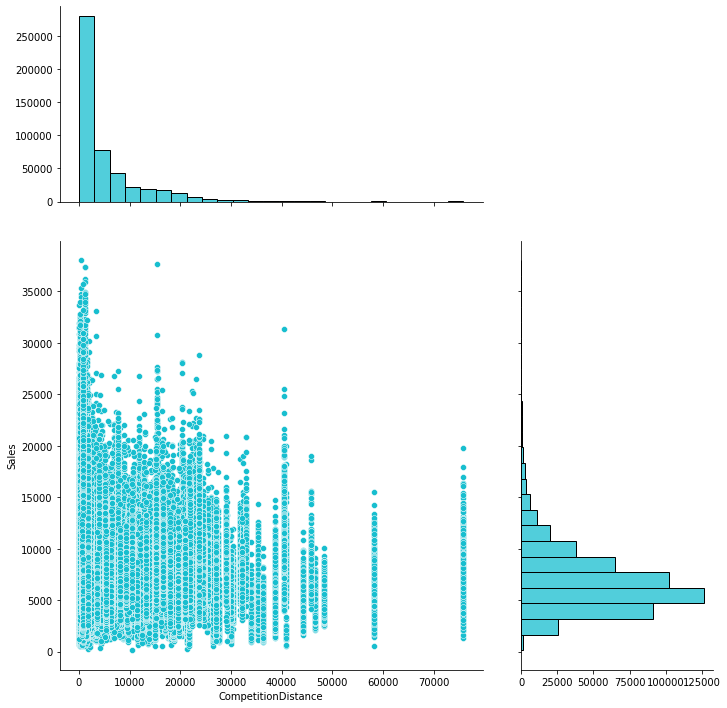

In [25]:
sns.jointplot(x="CompetitionDistance", y="Sales", 
              height=10, 
              ratio=2, 
              marginal_ticks=True,
              color = '#17becf',
              marginal_kws=dict(bins=25, fill=True),
              data=nonzero_merged_Sales);

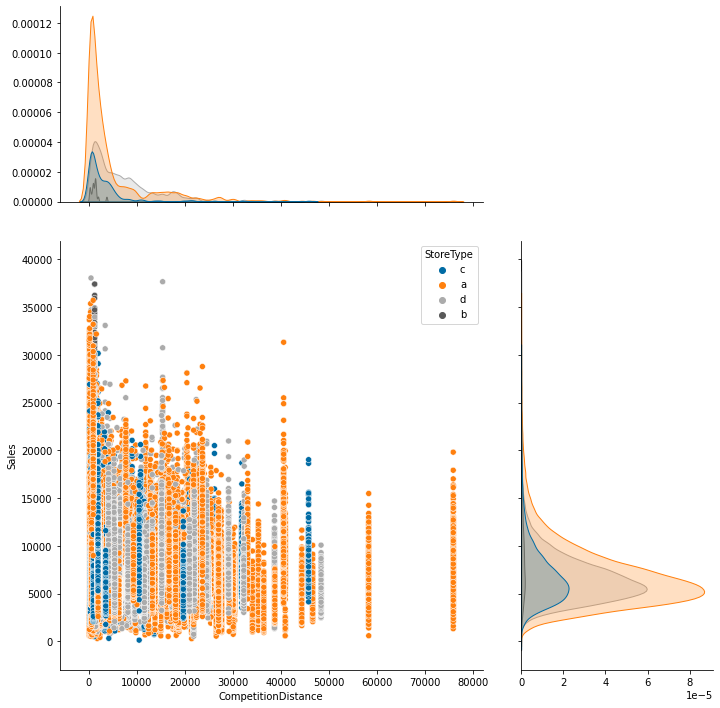

In [23]:
sns.jointplot(x="CompetitionDistance", y="Sales", 
              height=10, 
              ratio=2, 
              marginal_ticks=True,
              hue='StoreType',
              #marginal_kws=dict(bins=25, fill=True),
              data=nonzero_merged_Sales);

## 3. Categorical features vs target

### 3.1 Average Sales in different StoreType

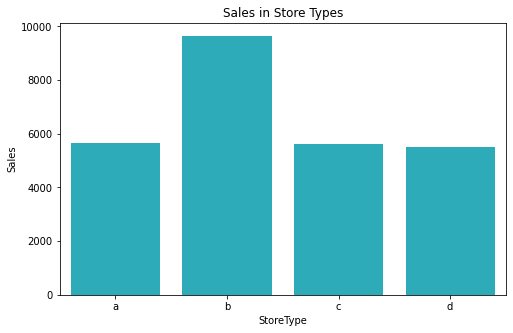

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x="StoreType", y="Sales", 
            ci=None,
            color = '#17becf',
            data=merged_train_store.sort_values(by = ["StoreType"])).set_title("Sales in Store Types");

### 3.2 Average Sales in different Assortment

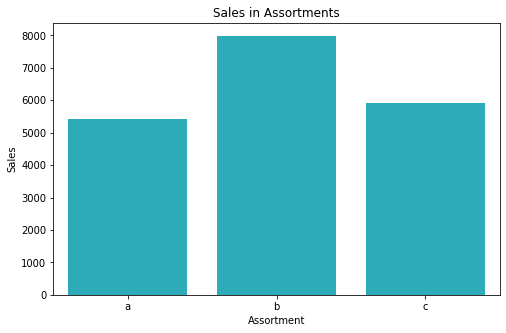

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Assortment", y="Sales", 
            ci=None,
            color = '#17becf',
            data=merged_train_store.sort_values(by = ["Assortment"])).set_title("Sales in Assortments");

### 3.3 Average Sales over the DayOfWeek with StoreType breakdown

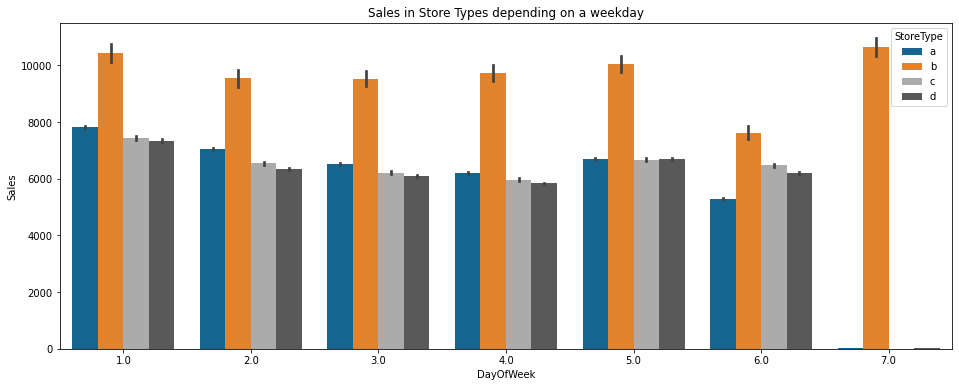

In [11]:
merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType'])

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek', y='Sales', 
            #hue = 'Assortment', 
            hue = 'StoreType',
            data=merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType']))
plt.title("Sales in Store Types depending on a weekday");

### 3.3 Distribution of Sales over the DayOfWeek with StoreType breakdown 

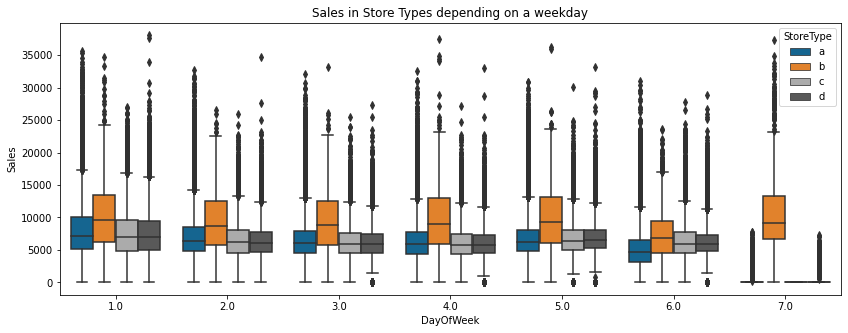

In [6]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='DayOfWeek', y='Sales', 
            #hue = 'Assortment', 
            hue = 'StoreType',
            data=merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType']))
plt.title("Sales in Store Types depending on a weekday");